<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цель работы**

Построить модель, которая предскажет коэффициент восстановления золота из золотосодержащей руды

**Описание данных**

Данные находятся в трёх файлах:
- gold_recovery_train_new.csv — обучающая выборка;
- gold_recovery_test_new.csv — тестовая выборка;
- gold_recovery_full_new.csv — исходные данные.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

Данные сырые: их просто выгрузили из хранилища. 

**План работы**

- Открыть файлы и изучить данные.
- Рассчитать эффективность обогащения и с помощью МАЕ проверить правильность расчетов
- Выяснить, каких признаков нет в тестовой выборке
- Провести предобработку данных(дубликаты, пропуски, типы данных и т.п.)
- Посмотреть, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
- Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.
- Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
- Написать функцию для вычисления итоговой sMAPE.
- Обучить разные модели и оценить их качество кросс-валидацией. 
- Выбрать лучшую модель и проверить её на тестовой выборке. 
- Написать вывод

## Подготовка данных

**1.1 Изучение данных**

In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from collections import defaultdict
from sklearn.dummy import DummyRegressor

In [3]:
# откроем файлы с данными
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [4]:
# функция для изучения данных
def exploration(data):
    display(data.head())
    data.info()
    display(data.describe())
print('Data_train')    
exploration(data_train)

Data_train


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [5]:
print('Data_test')    
exploration(data_test)

Data_test


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [6]:
print('Data_full')    
exploration(data_full)

Data_full


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


**Вывод по пункту 1.1**

Изучив данные в трех датасетах, заметили следующее:

- в первом датасете 14149 строк и 87 столбцов, во втором датасете 5290 строк и 53 столбца, в третьем датасете 19439 строк и 87 столбцов
- названия столбцов в корректном виде
- типы столбцов корректны, кроме столбца date
- целевой признак количественный, значит, это задача регрессии
- во всех трех датасетах есть столбцы с отрицательными значениями и с пропусками

**1.2 Проверим, что эффективность обогащения рассчитана правильно.** 

In [7]:
# введем необходимые для расчета переменные и найдем эффективность обогащения
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']
recovery = C * (F-T)/(F*(C-T))*100
print(recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64


In [8]:
# найдем MAE между расчётами и значением признака
print('MAE:', mean_absolute_error(data_train['rougher.output.recovery'],recovery))

MAE: 9.73512347450521e-15


**Вывод по пункту 1.2**

В ходе проделанной работы была найдена эффективность обогащения и рассчитано среднее абсолютное отклонение найденных значений от значений признака. Мы видим, что среднее абсолютное отклонение очень маленькое. Следовательно, эффективность обогащения рассчитана верно 

**1.3 Проанализируем признаки, недоступные в тестовой выборке.**

In [9]:
# найдем столбцы, которые есть в полной выборке, но нет в тестовой
column_list = []
for column in data_full.columns:
    if column not in data_test.columns:
        column_list.append(column)
for i in column_list:
    print(i, end='\n')
print(len(column_list))

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

**Вывод по пункту 1.3**

В ходе исследования мы выявили столбцы, которые есть в полной выборке, но нет в тестовой. Таких столбцов 34. Из этих столбцов два являются целевыми признаками. Это final.output.recovery и rougher.output.recovery. Их надо будет добавить в тестовую выборку. А остальные признаки надо будет убрать из тренировочной выборки.

Заметим, что из 34 признаков 30 относятся к output, т.е. к параметрам продукта, и только 4 к расчетным характеристикам. Возможно, значения этих признаков недоступны во время технологического процесса, они рассчитываются позже.


**1.4 Проведение предобработки данных.**

In [10]:
# преобразуем к корректному типу данных столбец date, который есть во всех трех датасетах
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%dT%H:%M:%S')
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%dT%H:%M:%S')
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%dT%H:%M:%S')

# проверка
data_train.info()
data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

In [11]:
# разберемся с недостающими столбцами в тестовой выборке
data_test = data_test.merge(data_full.loc[:,['date', "rougher.output.recovery","final.output.recovery"]],on = 'date')
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [13]:
# проверим пропуски в полученных датасетах
def data_nan(data):
    print('Количество дубликатов:', data.duplicated().sum())
    print('Количество пропусков:', data.isna().sum().sort_values(ascending=False))
data_nan(data_train)

Количество дубликатов: 0
Количество пропусков: secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64


In [14]:
data_nan(data_test)

Количество дубликатов: 0
Количество пропусков: rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
secondary_cleaner.state.floatbank2_a_air       3
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.state.floatbank2_a_level     0
rougher.state.floatbank10_f_level              0
secondary_cleaner.state.floatbank2_b_level     0
date                                           0
rougher.state.floatban

In [15]:
data_nan(data_full)

Количество дубликатов: 0
Количество пропусков: secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_pb                         0
rougher.output.tail_sol                        0
date                                           0
Length: 87, dtype: int64


In [16]:
# обработаем пропуски в тренировочной и тестовой выборках
for data in (data_train, data_test):
    data.fillna(method='ffill', inplace=True)
    print('Количество пропусков:', data.isna().sum().sort_values(ascending=False))

Количество пропусков: date                                          0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
                                             ..
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_b_air        0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
Количество пропусков: date                                          0
secondary_cleaner.state.floatbank3_b_air      0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.s

**Вывод по пункту 1.4**

В ходе предобработки данных было проделано следующее:

- в трех датасетах столбец date был приведен к корректному типу данных datetime
- в тестовую выборку добавлены два недостающих целевых признака из полной выборки
- проверили датасеты на наличие дубликатов и пропусков: явных дубликатов нет нигде, пропуски есть во всех трех выборках
- в полной выборке пропуски нет смысла обрабатывать
- в тренировочной и тестовой обработали пропуски методом ffill

Данные готовы к работе

## Анализ данных

**2.1 Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.** 

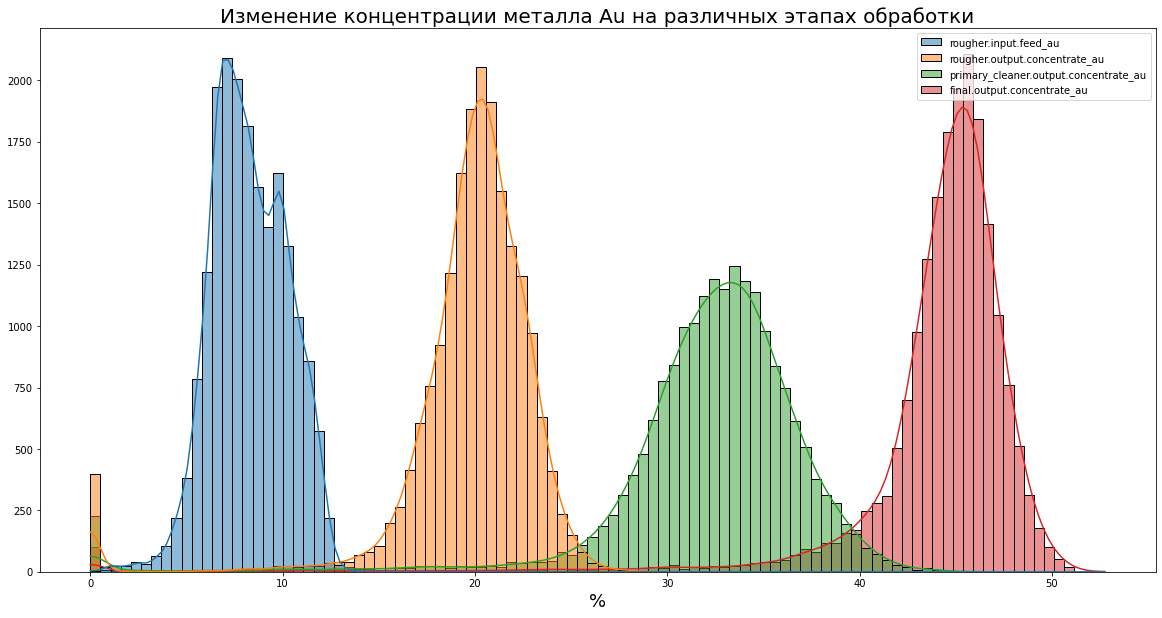

In [17]:
plt.figure(figsize=(20, 10))
sns.histplot(data_full[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']], kde=True, bins=100)
plt.title('Изменение концентрации металла Au на различных этапах обработки', fontsize=20)
plt.ylabel('')
plt.xlabel('%', fontsize=18)
plt.show()

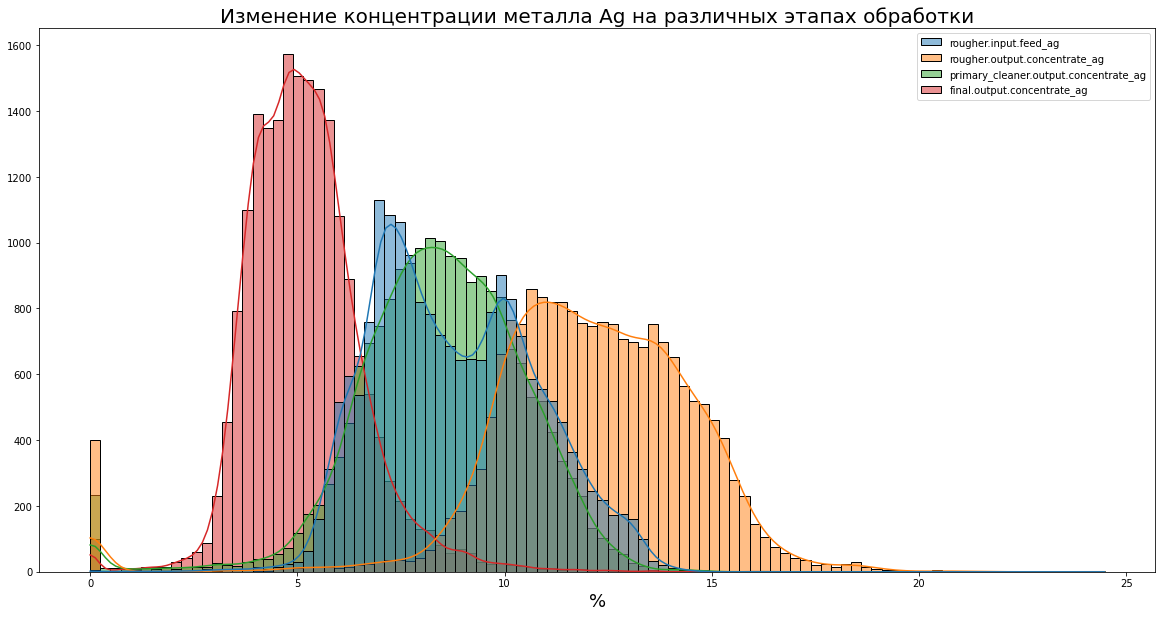

In [18]:
plt.figure(figsize=(20, 10))
sns.histplot(data_full[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']], kde=True, bins=100)
plt.title('Изменение концентрации металла Ag на различных этапах обработки', fontsize=20)
plt.ylabel('')
plt.xlabel('%', fontsize=18)
plt.show()

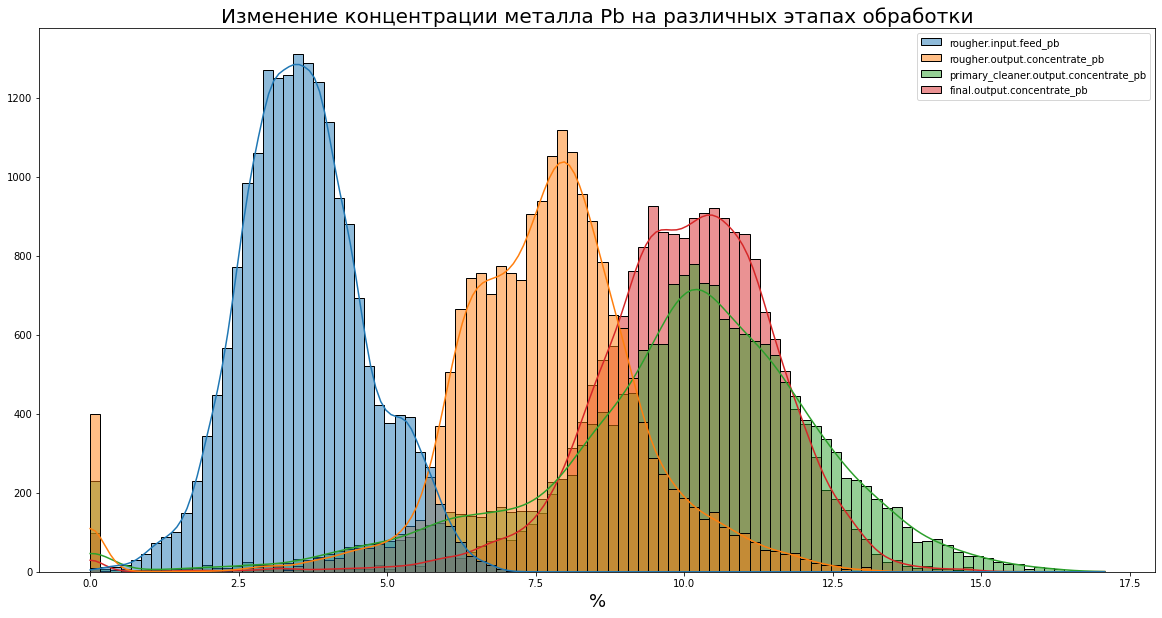

In [19]:
plt.figure(figsize=(20, 10))
sns.histplot(data_full[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']], kde=True, bins=100)
plt.title('Изменение концентрации металла Pb на различных этапах обработки', fontsize=20)
plt.ylabel('')
plt.xlabel('%', fontsize=18)
plt.show()

**Вывод по пункту 2.1**

В ходе выполнения данного пункта были построены графики изменения концентрации золота, серебра и свинца на разных этапах обработки. По первому графику мы видим, что концентрация золота от этапа к этапу растет. У серебра концентрация сначала растет, а потом снижается. У свинца на первых трех этапах растет, а на четвертом практически совпадает с третьим

**2.2 Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


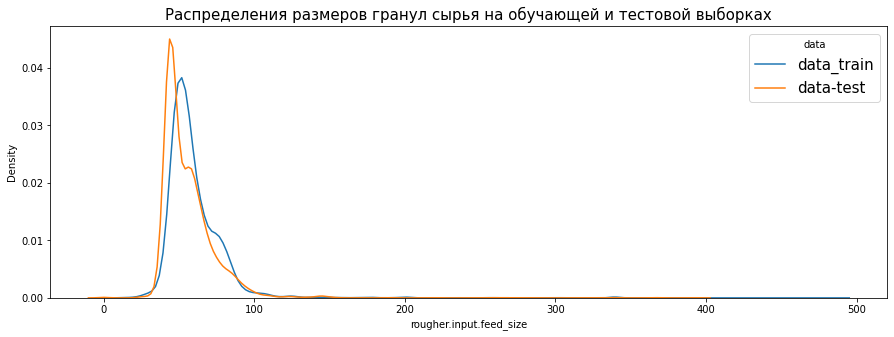

In [20]:
plt.figure(figsize=(15, 5))
for data, name in zip([data_train['rougher.input.feed_size'], data_test['rougher.input.feed_size']], ['data_train', 'data-test']):
    sns.distplot(data, hist=False, kde=True, label=name, bins=100)
plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках', fontsize=15)
plt.legend(prop={'size': 15}, title = 'data')
plt.show()

**Вывод по пункту 2.2**

В ходе работы над этим пунктом были построены графики распределения размеров гранул сырья на обучающей и тестовой выборках. По графику мы видим, что распределения очень похожи.

**2.3 Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


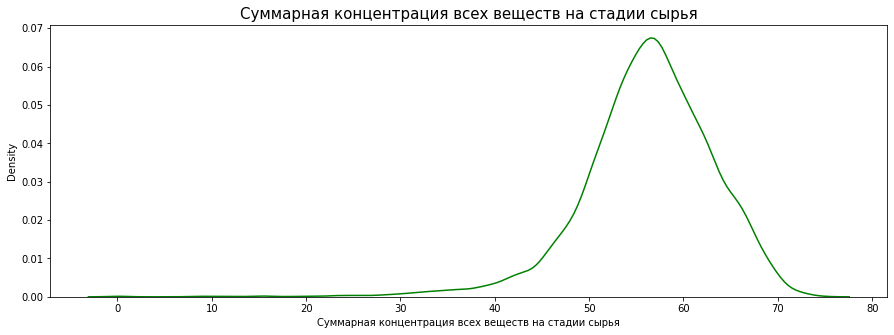

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


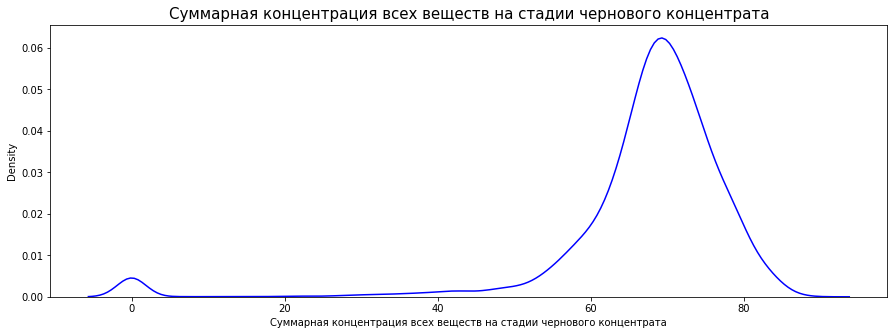

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


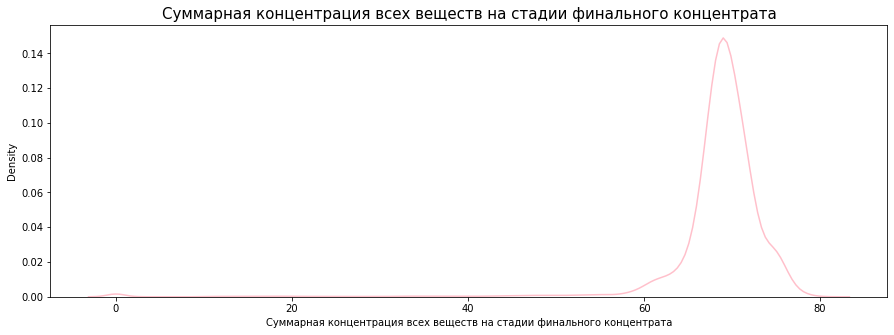

In [28]:
data_train.loc[:, 'Суммарная концентрация всех веществ на стадии сырья'] = data_train.loc[:, ['rougher.input.feed_au',
                                'rougher.input.feed_ag',
                                'rougher.input.feed_pb',
                                'rougher.input.feed_sol']].sum(axis=1)

data_train.loc[:, 'Суммарная концентрация всех веществ на стадии чернового концентрата'] = data_train.loc[:, ['rougher.output.concentrate_au',
                                'rougher.output.concentrate_ag',
                                'rougher.output.concentrate_pb',
                                'rougher.output.concentrate_sol']].sum(axis=1)

    
data_train.loc[:, 'Суммарная концентрация всех веществ на стадии финального концентрата'] = data_train.loc[:, ['final.output.concentrate_au',
                               'final.output.concentrate_ag',
                               'final.output.concentrate_pb',
                               'final.output.concentrate_sol']].sum(axis=1)

plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на стадии сырья', fontsize=15)
sns.distplot(data_train['Суммарная концентрация всех веществ на стадии сырья'], color='green', hist=False, kde=True, bins=100)
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на стадии чернового концентрата', fontsize=15)
sns.distplot(data_train['Суммарная концентрация всех веществ на стадии чернового концентрата'], color='blue', hist=False, kde=True, bins=100)
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на стадии финального концентрата', fontsize=15)
sns.distplot(data_train['Суммарная концентрация всех веществ на стадии финального концентрата'], color='pink', hist=False, kde=True, bins=100)
plt.show()

Можно заметить, что во всех распределениях присутствует пик около нулевого значения. Он очень далек от общего распределения, его следует удалить. 

In [31]:
# удаление выбросов из тренировочной выборки
data_train = data_train.loc[data_train['rougher.input.feed_au'] > 1]
data_train = data_train.loc[data_train['rougher.input.feed_ag'] > 1]
data_train = data_train.loc[data_train['rougher.input.feed_pb'] > 1]
data_train = data_train.loc[data_train['rougher.input.feed_sol'] > 1]

data_train = data_train.loc[data_train['rougher.output.concentrate_au'] > 1]
data_train = data_train.loc[data_train['rougher.output.concentrate_ag'] > 1]
data_train = data_train.loc[data_train['rougher.output.concentrate_pb'] > 1]
data_train = data_train.loc[data_train['rougher.output.concentrate_sol'] > 1]

data_train = data_train.loc[data_train['primary_cleaner.output.concentrate_au'] > 1]
data_train = data_train.loc[data_train['primary_cleaner.output.concentrate_ag'] > 1]
data_train = data_train.loc[data_train['primary_cleaner.output.concentrate_pb'] > 1]
data_train = data_train.loc[data_train['primary_cleaner.output.concentrate_sol'] > 1]

data_train = data_train.loc[data_train['final.output.concentrate_au'] > 1]
data_train = data_train.loc[data_train['final.output.concentrate_ag'] > 1]
data_train = data_train.loc[data_train['final.output.concentrate_pb'] > 1]
data_train = data_train.loc[data_train['final.output.concentrate_sol'] > 1]

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


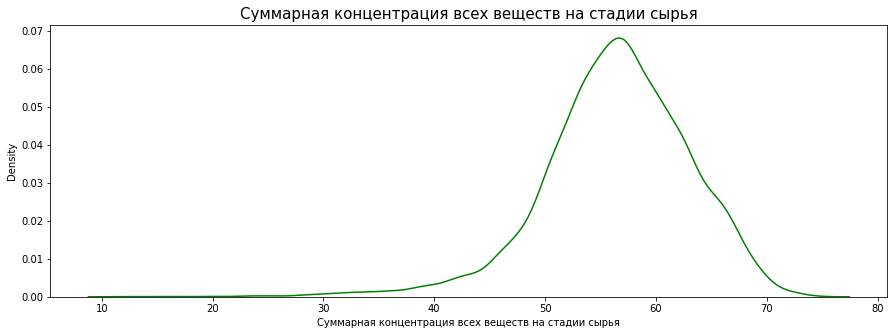

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


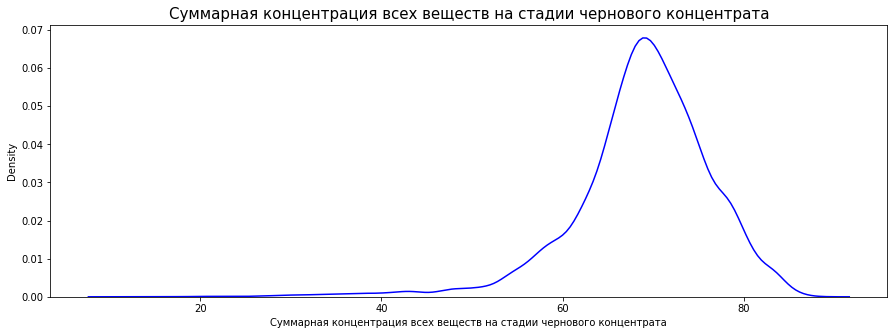

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


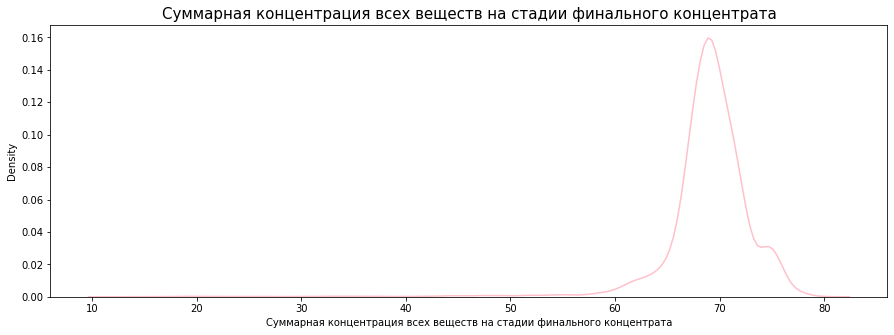

In [32]:
# проверим изменения на графиках
data_train.loc[:, 'Суммарная концентрация всех веществ на стадии сырья'] = data_train.loc[:, ['rougher.input.feed_au',
                                'rougher.input.feed_ag',
                                'rougher.input.feed_pb',
                                'rougher.input.feed_sol']].sum(axis=1)

data_train.loc[:, 'Суммарная концентрация всех веществ на стадии чернового концентрата'] = data_train.loc[:, ['rougher.output.concentrate_au',
                                'rougher.output.concentrate_ag',
                                'rougher.output.concentrate_pb',
                                'rougher.output.concentrate_sol']].sum(axis=1)

    
data_train.loc[:, 'Суммарная концентрация всех веществ на стадии финального концентрата'] = data_train.loc[:, ['final.output.concentrate_au',
                               'final.output.concentrate_ag',
                               'final.output.concentrate_pb',
                               'final.output.concentrate_sol']].sum(axis=1)

plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на стадии сырья', fontsize=15)
sns.distplot(data_train['Суммарная концентрация всех веществ на стадии сырья'], color='green', hist=False, kde=True, bins=100)
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на стадии чернового концентрата', fontsize=15)
sns.distplot(data_train['Суммарная концентрация всех веществ на стадии чернового концентрата'], color='blue', hist=False, kde=True, bins=100)
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Суммарная концентрация всех веществ на стадии финального концентрата', fontsize=15)
sns.distplot(data_train['Суммарная концентрация всех веществ на стадии финального концентрата'], color='pink', hist=False, kde=True, bins=100)
plt.show()

**Вывод по пункту 2.3**

- Суммарная концентрация всех веществ на стадиях от сырья к финальной стадии возрастает
- Удалили выбросы из обучающей выборки

## Модель

In [33]:
# обрезаем тренировочную выборку, оставив только те столбцы, которые есть в тестовой
data_train = data_train[data_test.columns]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        13304 non-null  datetime64[ns]
 1   primary_cleaner.input.sulfate               13304 non-null  float64       
 2   primary_cleaner.input.depressant            13304 non-null  float64       
 3   primary_cleaner.input.feed_size             13304 non-null  float64       
 4   primary_cleaner.input.xanthate              13304 non-null  float64       
 5   primary_cleaner.state.floatbank8_a_air      13304 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_level    13304 non-null  float64       
 7   primary_cleaner.state.floatbank8_b_air      13304 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_level    13304 non-null  float64       
 9   primar

**3.1 Напишем функцию для вычисления итоговой sMAPE**

In [34]:
def smape(y, y_pred, **kwargs):
    return (((abs(y - y_pred) * 2 * 100) /
              (abs(y) + abs(y_pred))).sum()) / len(y)

def end_smape(rougher_smape, final_smape):
    return 0.25 * rougher_smape.item() + 0.75 * final_smape.item()

**3.2 Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.**

In [35]:
# удаление ненужного для моделей столбца date
data_train = data_train.drop(['date'], axis=1)
data_test = data_test.drop(['date'], axis=1)
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13304 non-null  float64
 1   primary_cleaner.input.depressant            13304 non-null  float64
 2   primary_cleaner.input.feed_size             13304 non-null  float64
 3   primary_cleaner.input.xanthate              13304 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13304 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13304 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13304 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13304 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13304 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13304 non-null  float64
 10  primary_cl

In [36]:
# отделим целевые признаки от признаков в обучающей и тестовой выборках
features_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_rougher = data_train['rougher.output.recovery']
target_train_final= data_train['final.output.recovery']

features_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher = data_test['rougher.output.recovery']
target_test_final = data_test['final.output.recovery']

In [37]:
# функция для применения кросс-валидации
def get_cv_scores(model, target, features):
    my_scorer = make_scorer(smape)
    
    scores = cross_val_score(model,
                             features,
                             target,
                             cv=5,
                             scoring=my_scorer)
    
    return scores.mean()

In [38]:
tree = defaultdict(list)

state = np.random.RandomState(12345)

# построим и исследуем модель Решающее дерево
for depth in range(1, 11):
    
    model_rougher_tree = DecisionTreeRegressor(max_depth=depth, random_state=state)
    model_final_tree = DecisionTreeRegressor(max_depth=depth, random_state=state)


    smape_rougher_tree = get_cv_scores(model_rougher_tree, target_train_rougher, features_train)
    smape_final_tree = get_cv_scores(model_final_tree, target_train_final, features_train)
    tree['smape_rougher_tree'].append(smape_rougher_tree)
    tree['smape_final_tree'].append(smape_final_tree)
    tree['smape_result_tree'].append(end_smape(smape_rougher_tree, smape_final_tree))
    tree['depth'].append(depth)
    
display(pd.DataFrame(tree).sort_values(by='smape_result_tree'))

,smape_rougher_tree,smape_final_tree,smape_result_tree,depth
2,7.237966,9.017300,8.572467,3
1,7.682140,8.997029,8.668307,2
4,6.752620,9.514451,8.823993,5
0,7.805160,9.200628,8.851761,1
3,7.219191,9.595976,9.001780,4
5,7.505132,10.008128,9.382379,6
6,7.629819,10.924342,10.100711,7
8,8.111485,11.521427,10.668941,9
7,8.019881,11.812825,10.864589,8
9,8.482888,12.765902,11.695149,10


Для модели Решающее дерево лучший sMAPE при следующих параметрах: max_depth=3, smape_result_tree=8.572467

In [39]:
# построим и исследуем модель Случайный лес
forest = defaultdict(list)
for est in range(1, 20):
    model_rougher_forest = RandomForestRegressor(max_depth=3, n_estimators=est, random_state=state)
    model_final_forest = RandomForestRegressor(max_depth=3, n_estimators=est, random_state=state)
    
    smape_rougher_forest = get_cv_scores(model_rougher_forest, target_train_rougher, features_train)
    smape_final_forest = get_cv_scores(model_final_forest, target_train_final, features_train)
    
    forest['smape_rougher_forest'].append(smape_rougher_forest)
    forest['smape_final_forest'].append(smape_final_forest)
    forest['smape_result_forest'].append(end_smape(smape_rougher_forest, smape_final_forest))
    forest['est'].append(est)

display(pd.DataFrame(forest).sort_values(by='smape_result_forest'))

,smape_rougher_forest,smape_final_forest,smape_result_forest,est
8,6.828135,8.787266,8.297483,9
9,6.832660,8.786844,8.298298,10
10,6.831628,8.789270,8.299859,11
18,6.892476,8.786246,8.312803,19
13,6.860666,8.803150,8.317529,14
12,6.863854,8.807830,8.321836,13
14,6.868122,8.809088,8.323847,15
16,6.896460,8.800137,8.324218,17
15,6.883020,8.805797,8.325103,16
17,6.906908,8.798970,8.325954,18


Для модели Случайный лес лучший sMAPE при следующих параметрах: est=9, smape_result_forest=8.297483

In [40]:
# построим и исследуем модель Линейная регрессия
model_rougher_linear = LinearRegression()
model_final_linear = LinearRegression()

smape_rougher_linear = get_cv_scores(model_rougher_linear, target_train_rougher, features_train)
smape_final_linear = get_cv_scores(model_final_linear, target_train_final, features_train)
smape_result_linear = end_smape(smape_rougher_linear, smape_final_linear)

linear_temp = pd.Series({'smape_rougher_linear': smape_rougher_linear, 'smape_final_linear': smape_final_linear, 'smape_result_linear': smape_result_linear}) 
display(linear_temp)

smape_rougher_linear     7.281963
smape_final_linear      10.676503
smape_result_linear      9.827868
dtype: float64

Для модели Линейная регрессия лучший sMAPE smape_result_linear=9.827868

**Вывод**

Лучшая модель - модель Случайного леса с количеством деревьев est=9  и показателем sMAPE=8.297483

**Проверка лучшей модели на тестовой выборке**

In [41]:
test_dict = defaultdict(list)

model_rougher_forest = RandomForestRegressor(max_depth=3, n_estimators=9, random_state=state)
model_final_forest =  RandomForestRegressor(max_depth=3, n_estimators=9, random_state=state)

model_rougher_forest.fit(features_train, target_train_rougher)
model_final_forest.fit(features_train, target_train_final)

predictions_rougher = model_rougher_forest.predict(features_test)
predictions_final = model_final_forest.predict(features_test)

test_dict['smape_rougher'].append(smape(target_test_rougher, predictions_rougher))
test_dict['smape_final'].append(smape(target_test_final, predictions_final))
test_dict['smape_result'].append(end_smape(smape(target_test_rougher, predictions_rougher), smape(target_test_final, predictions_final)))

display(pd.DataFrame(test_dict))

,smape_rougher,smape_final,smape_result
0,8.427228,9.935884,9.55872


In [44]:
# проверим найденную модель на адекватность

model_dummy_rougher = DummyRegressor(strategy="mean")
model_dummy_final = DummyRegressor(strategy="mean")

model_dummy_rougher.fit(features_train, target_train_rougher)
model_dummy_final.fit(features_train, target_train_final)

predictions_rougher_dummy = model_dummy_rougher.predict(features_test)
predictions_final_dummy = model_dummy_final.predict(features_test)

smape_rougher = smape(target_test_rougher, predictions_rougher_dummy)
smape_final = smape(target_test_final, predictions_final_dummy)
smape_result = end_smape(smape_rougher, smape_final)

dummy = pd.Series({'smape_rougher': smape_rougher, 'smape_final': smape_final, 'smape_result': smape_result }) 
print(dummy)

smape_rougher     8.968490
smape_final      10.003827
smape_result      9.744993
dtype: float64


**Вывод**

- Наилучшая модель Случайный лес с количеством деревьев 9 и глубиной 3
- При проверке на тестовой выборке она показала результат 9.55872. Прошла проверку на адекватность. Следовательно, модель выбрана правильно

**Общий вывод**

Изучив данные в трех датасетах, заметили следующее:

- в первом датасете 14149 строк и 87 столбцов, во втором датасете 5290 строк и 53 столбца, в третьем датасете 19439 строк и 87 столбцов
- названия столбцов в корректном виде
- типы столбцов корректны, кроме столбца date

Далее, в ходе проделанной работы была найдена эффективность обогащения и рассчитано среднее абсолютное отклонение найденных значений от значений признака. Мы видим, что среднее абсолютное отклонение очень маленькое. Следовательно, эффективность обогащения рассчитана верно 

В ходе исследования мы выявили столбцы, которые есть в полной выборке, но нет в тестовой. Таких столбцов 34. Из этих столбцов два являются целевыми признаками. Это final.output.recovery и rougher.output.recovery. Их надо будет добавить в тестовую выборку. А остальные признаки надо будет убрать из тренировочной выборки.

Заметим, что из 34 признаков 30 относятся к output, т.е. к параметрам продукта, и только 4 к расчетным характеристикам. Возможно, значения этих признаков недоступны во время технологического процесса, они рассчитываются позже.

В ходе предобработки данных было проделано следующее:

- в трех датасетах столбец date был приведен к корректному типу данных datetime
- в тестовую выборку добавлены два недостающих целевых признака из полной выборки
- в тренировочной выборке оставили только те столбцы, которые есть в тестовой выборке
- проверили датасеты на наличие дубликатов и пропусков: явных дубликатов нет нигде, пропуски есть во всех трех выборках
- в полной выборке пропуски нет смысла обрабатывать
- в тренировочной и тестовой обработали пропуски методом ffill

Изучая, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки, были построены графики изменения концентрации золота, серебра и свинца на разных этапах обработки. По первому графику мы видим, что концентрация золота от этапа к этапу растет. У серебра концентрация сначала растет, а потом снижается. У свинца на первых трех этапах растет, а на четвертом практически совпадает с третьим

В ходе сравнения распределения размеров гранул сырья на обучающей и тестовой выборках, были построены графики распределения размеров гранул сырья на этих выборках. По графику мы видим, что распределения очень похожи.

Суммарная концентрация всех веществ на стадиях от сырья к финальной стадии возрастает. Были замечены и удалены выбросы.

Написали функцию для вычисления итоговой sMAPE

В последнем пункте были рассмотрены три модели Решающее дерево, случайный лес и Линейная регрессия. С помощью кросс-валидации и метрики sMAPE была отобрана лучшая модель Случайное дерево с количеством деревьев 9 и глубиной 3. При проверке на тестовой выборке она показала результат 9.55872. Прошла проверку на адекватность. Следовательно, модель выбрана правильно